In [ ]:
#import the needed libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# Exercise 6 : Count Coins

In this problem, we want to count coins in a given image, download coins.jpg from the handout webpage. Implement an algorithm that can count how many coins are given in this image.

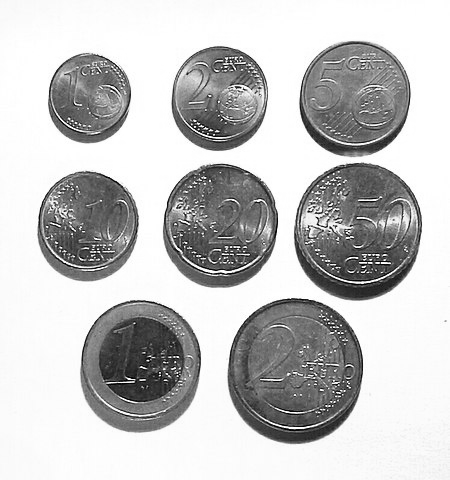

In [ ]:
#Load the image
coins = cv2.imread('/content/coins.jpg')

#Convert image to grayscale
gray_coins= cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

#Show image
cv2_imshow(gray_coins)

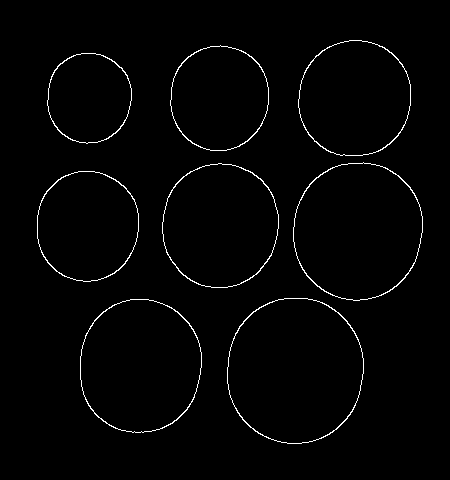

In [ ]:
#To reduce the noise we apply the Gaussian filter
blur_coins = cv2.GaussianBlur(gray_coins, (15, 15), 0) #With a higher blur we can detect the outline edges of the coins better.

#Detect the edges with Canny edge detection
edges_canny = cv2.Canny(blur_coins, 10, 200)

#Show edges
cv2_imshow(edges_canny)

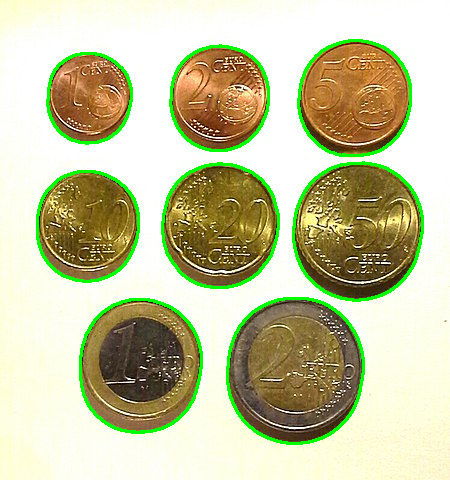

Number of coins: 8


In [ ]:
#Counting the coins by using the contours of each coin
#Find contours
contours, _ = cv2.findContours(edges_canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #Retreives extrenal contours, compression

#Create a copy of the original image to draw contours on
contour_image = coins.copy()
#Draw contours on the copy of the image
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2) # -1 indicates all contours should be drawn, green colour, thickness
#Show the image with contours
cv2_imshow(contour_image)

#Count the coins
coin_count = len(contours)

#Show the number of counted coins
print(f"Number of coins: {coin_count}")